In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import urllib
from skimage import io
import pdb

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The type of this input is <class 'numpy.ndarray'>
Shape: (1185, 1600, 3)


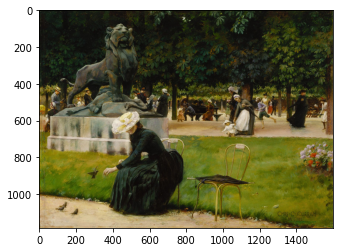

In [15]:
image = io.imread('https://uploads3.wikiart.org/00123/images/charles-courtney-curran/in-the-luxembourg-garden-1889.jpg')
#image = cv2.imread('https://uploads3.wikiart.org/00123/images/charles-courtney-curran/in-the-luxembourg-garden-1889.jpg')

print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

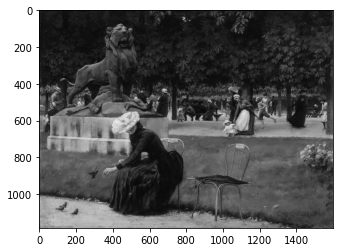

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

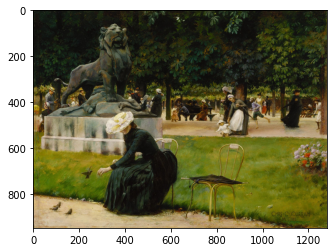

In [17]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [68]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Get colours from an image

In [ ]:
#modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
#modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [36]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([169.74340298, 185.0291393 , 182.96768891]),
 array([83.63301839, 90.7145873 , 85.83407766]),
 array([178.38046389, 201.43657814, 210.74184274]),
 array([156.00379365, 164.85971339, 154.08927903]),
 array([134.59720435, 141.62957028, 132.3225157 ]),
 array([113.97487282, 117.54417533, 107.23583944]),
 array([58.37709249, 58.45037076, 53.86863819])]

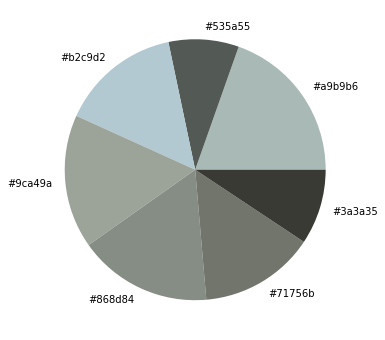

In [33]:
get_colors(get_image("2011-01580.jpg"), 7, True)

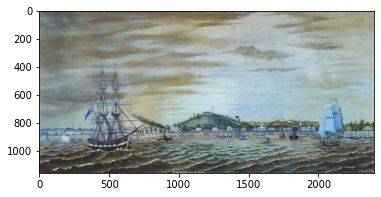

In [35]:
img = cv2.imread("2011-01580.jpg")

plt.imshow(img)

## Search images using colour

In [41]:
!ls

2011-01580.jpg			__MACOSX      playground.ipynb
2011-01580.jpg:Zone.Identifier	colour.ipynb


In [71]:
IMAGE_DIRECTORY = '../raw_data/Sandbox'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []
#pdb.set_trace()
for file in os.listdir(IMAGE_DIRECTORY):
#    images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
    if file.endswith('.jpg'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [80]:
print(len(images))
print(IMAGE_DIRECTORY)
#plt.imshow(images)

60
../raw_data/Sandbox


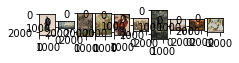

In [73]:
plt.figure(figsize=(20, 10))
for i in range(10):
#for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [83]:
img = images[:6]
print(len(img))

6


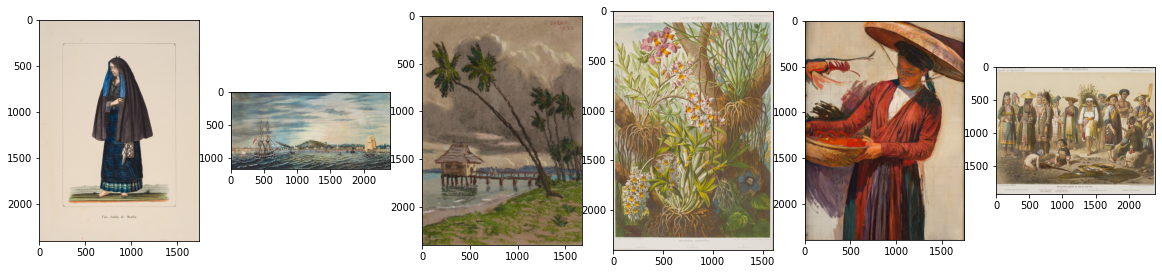

In [84]:
plt.figure(figsize=(20, 10))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.imshow(img[i])

In [85]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [86]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


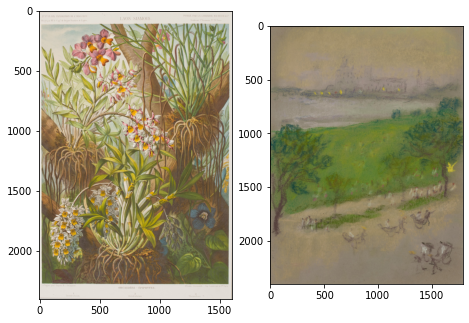

In [92]:
# Search for GREEN
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 1)

In [ ]:
# Search for BLUE
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

In [ ]:
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 1)

In [ ]:
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 3)

In [ ]:
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 1)

In [ ]:
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 3)

In [ ]:
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 3)

In [ ]:
# Search for YELLOW
%time
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 10)